# DAY 10 [16.7%]

## Next experiment: Adding more functions [rivisiting]

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
np.random.seed(5)

In [4]:
def mean_query(db):
    """
    Applies aa mean query over the db.
    
    params:
    ------
    db      -- Database.
    
    returns:
    -------
    Mean result.
    """
    return db.float().mean()

In [5]:
def create_databases(db, num_databases = 5000):
    """
    This function create a X number of databases from db,
    where each new database has one missing row (element).
    
    params:
    ------

    db            -- Base database.
    num_databases -- Number of database to create.
    
    returns
    -------
    List of databases.
    """
    databases = []
    for k in range(0, num_databases):
        databases.append(torch.cat([db[:k], db[k+1:]]))
    return databases

In [6]:
def create_db_and_parallels(num_entries):
    """
    Create parallel databases.
    
    params:
    ------
    num_entries  -- Number of samples.
    
    returns:
    -------
    db           -- A single database.
    databases    -- A database list.
    """
    db = torch.rand(num_entries) > 0.5
    databases = create_databases(db, num_entries)
    return db, databases

In [7]:
def create_dbs(num_entries):
    """
    Creates two databases using a random coin flip.
    
    params:
    ------
    num_entries    -- Total samples.
    
    returns:
    -------
    db             -- Normal data base,
    db_            -- Database created by coin flips.
    """
    db = torch.rand(num_entries) > 0.5
    db_ = db.data.clone()
    first_coin_flip = (torch.rand(len(db)) > .5).float()
    second_coin_flip = (torch.rand(len(db)) > .5).float()
    db_ = db.float() * first_coin_flip + (1 - first_coin_flip) * second_coin_flip
    return db, db_

In [8]:
def apply_query(query, num_entries, print_results = True):
    """
    Applies a query over the database.
    
    params:
    -----
    query           -- Query function.
    num_entries     -- Total samples.
    print_results   -- Print the results.
    
    returns:
    ------
    Orignal, skewed and private queries.
    """
    # create the data bases
    db, db_ = create_dbs(num_entries)
    result_query = query(db)
    result_query_ = query(db_)
    if print_results:
        print('Result of the query on data of {} entries (original|skewed|privacy): {} | {} | {}'.
              format(num_entries, result_query, result_query_, (result_query_ * 2) - 0.5))
    return float(result_query), float(result_query_), float((result_query_ * 2) - 0.5)

In [9]:
def run_experiments(query, entries, name1, name2, file, print_results = True):
    """
    Applies a query (normal, skewed and dp) to a dataset with different entry values.
    
    params:
    ------
    query         -- Query to apply.
    entries       -- Total samples. 
    
    returns:
    Print the queries results (if print == True). Generate a plot.
    """
    
    result_query, skewed_query, dp_query = list(), list(), list()
    for e in entries:
        result_q, result_q_, dp = apply_query(query, e, print_results)
        result_query.append(result_q)
        skewed_query.append(result_q_)
        dp_query.append(dp)
    f, arr = plt.subplots(1, 2, figsize = (15, 5))
    
    arr[0].plot(entries, result_query)
    arr[0].plot(entries, skewed_query)
    arr[0].plot(entries, dp_query)
    arr[0].legend(['Original Data', 'Skewed Data', 'DP Data'])
    arr[0].set_xlabel(r' entries ')
    arr[0].set_ylabel(r' Query ')
    arr[0].set_title(name1)
    
    arr[1].plot(np.log(entries), result_query)
    arr[1].plot(np.log(entries), skewed_query)
    arr[1].plot(np.log(entries), dp_query)
    arr[1].legend(['Original Data', 'Skewed Data', 'DP Data'])
    arr[1].set_xlabel(r'$ \log_{entries} $')
    arr[1].set_ylabel(r' Query ')
    arr[1].set_title(name2)

    f.savefig('../plots/local_privacy_' + file + '.png', dpi = 200, format = 'png', bbox_inches = 'tight')

In [10]:
def cumsum(db):
    """
    Sum each element in the dim 0.
    """
    return db.cumsum(dim = 0).sum().float()

def rand_sum(db):
    return (db.float() + torch.randn(db.size())).sum().float()

def logsum(db):
    return db.float().logsumexp(dim = 0).float()

def std(db):
    return db.float().std().float()

In [11]:
# set entries.
entries = [10, 100, 1000, 10000, 100000]

### Cumsum query

Result of the query on data of 10 entries (original|skewed|privacy): 30.0 | 28.0 | 55.5
Result of the query on data of 100 entries (original|skewed|privacy): 3175.0 | 2387.0 | 4773.5
Result of the query on data of 1000 entries (original|skewed|privacy): 238991.0 | 252094.0 | 504187.5
Result of the query on data of 10000 entries (original|skewed|privacy): 25451436.0 | 25275076.0 | 50550152.0
Result of the query on data of 100000 entries (original|skewed|privacy): 2517135616.0 | 2499936000.0 | 4999872000.0


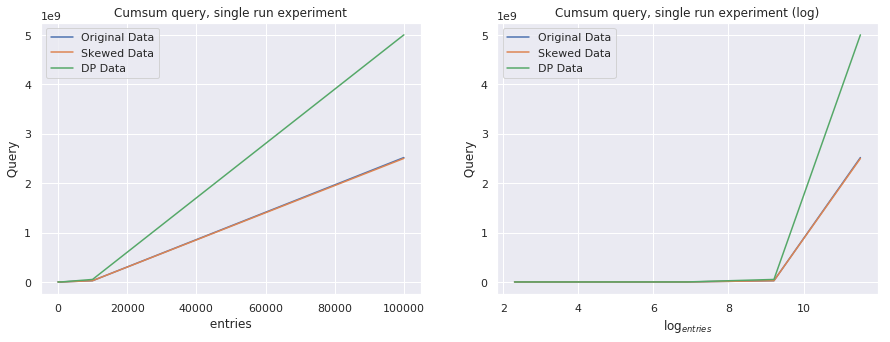

In [12]:
run_experiments(cumsum, entries, name1 = 'Cumsum query, single run experiment', 
                name2 = 'Cumsum query, single run experiment (log)', file = 'privacy_plot_cumsum')

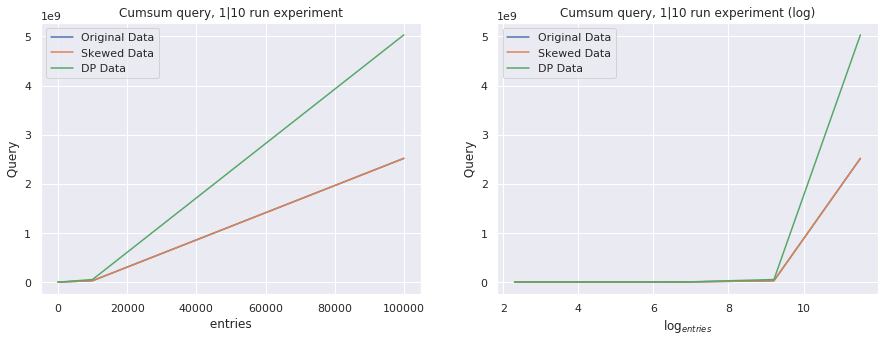

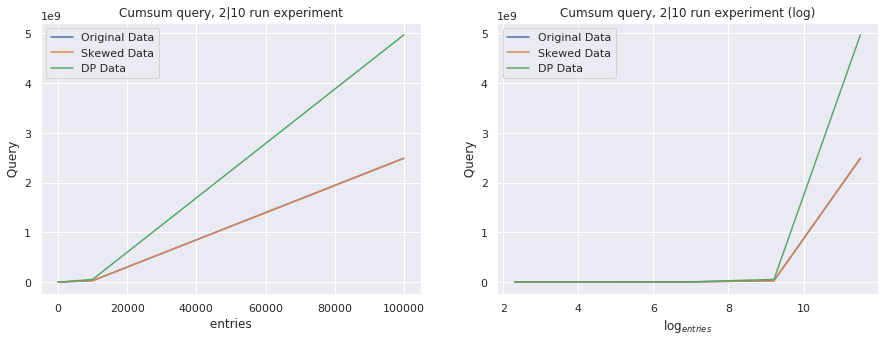

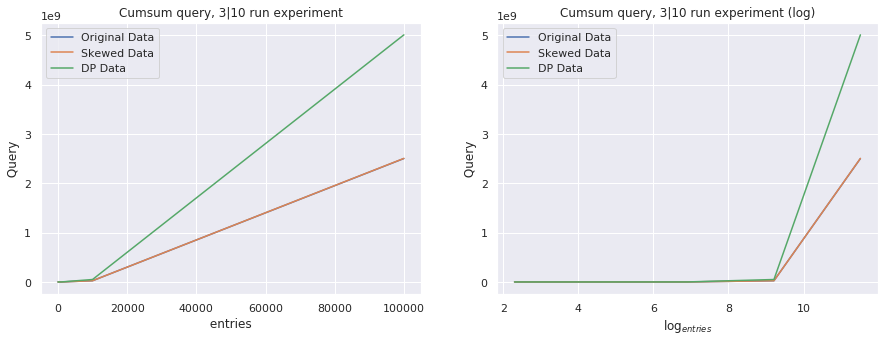

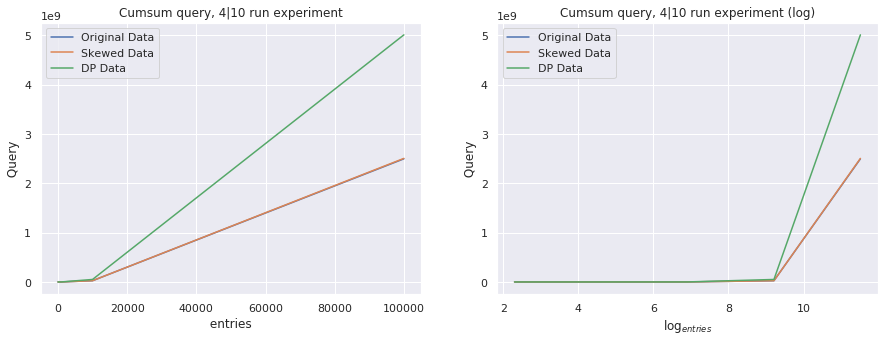

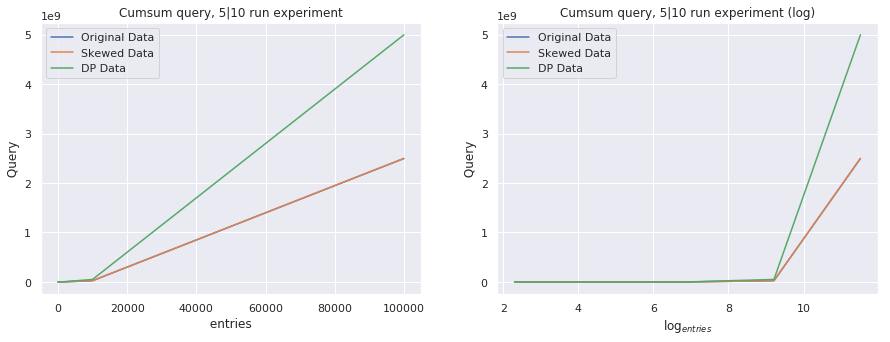

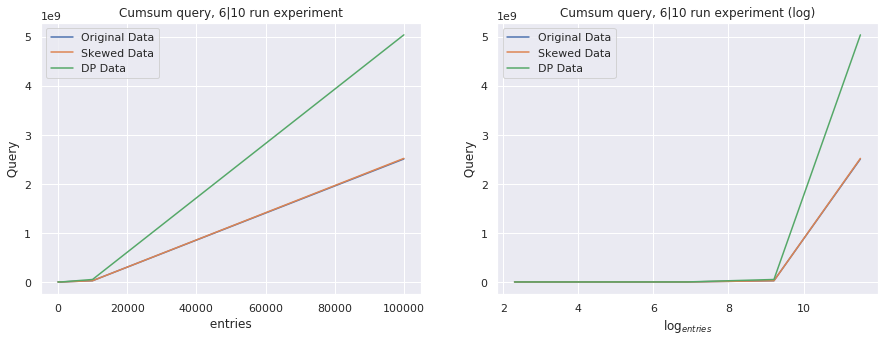

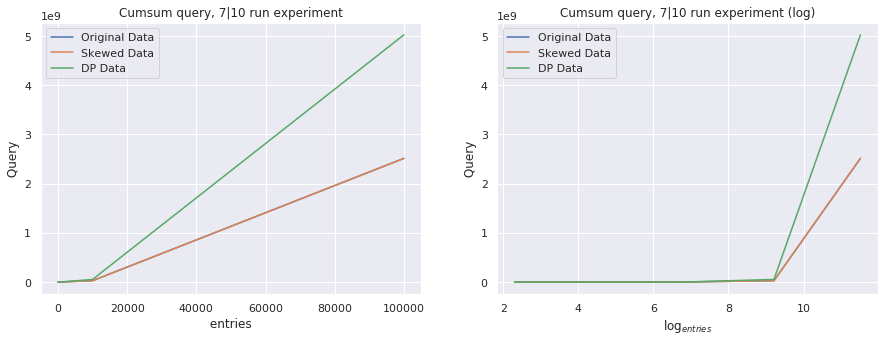

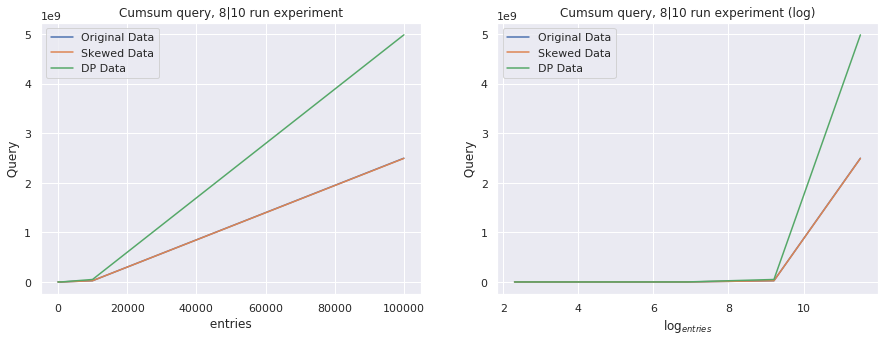

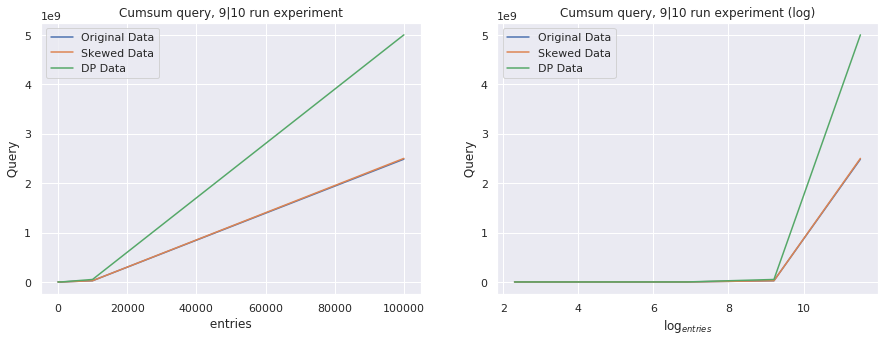

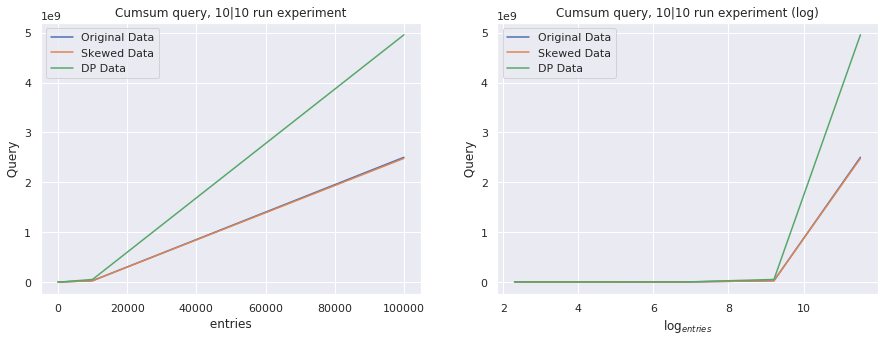

In [13]:
# run the experiment 10 times
for k in range(0, 10):
    run_experiments(cumsum, entries, name1 = 'Cumsum query, {}|10 run experiment'.format(k + 1), 
                    name2 = 'Cumsum query, {}|10 run experiment (log)'.format(k + 1), file = 'privacy_plot_cumsum_' + str(k + 1),
                   print_results = False)

---

### Random sum query

Result of the query on data of 10 entries (original|skewed|privacy): 3.7605063915252686 | -2.802210807800293 | -6.104421615600586
Result of the query on data of 100 entries (original|skewed|privacy): 38.606483459472656 | 33.02545928955078 | 65.55091857910156
Result of the query on data of 1000 entries (original|skewed|privacy): 455.9635009765625 | 537.3455200195312 | 1074.1910400390625
Result of the query on data of 10000 entries (original|skewed|privacy): 5060.19873046875 | 4893.4111328125 | 9786.322265625
Result of the query on data of 100000 entries (original|skewed|privacy): 50747.58203125 | 50189.5546875 | 100378.609375


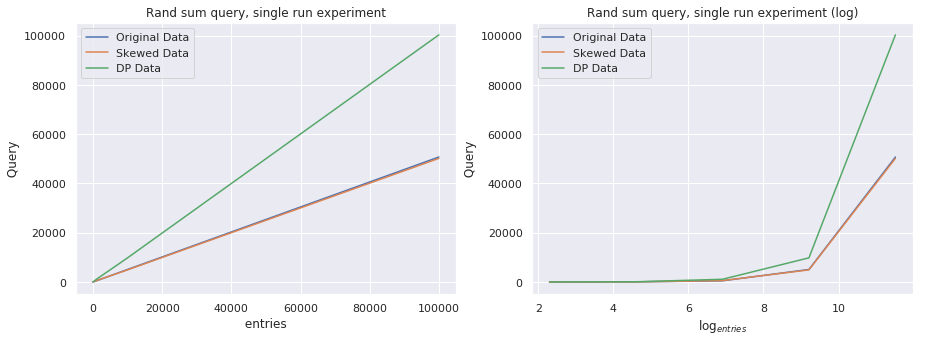

In [14]:
run_experiments(rand_sum, entries, name1 = 'Rand sum query, single run experiment', 
                name2 = 'Rand sum query, single run experiment (log)', file = 'privacy_plot_rand_sum')

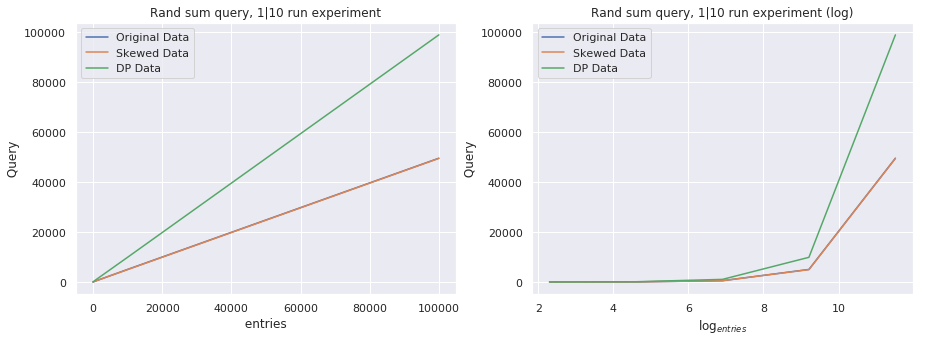

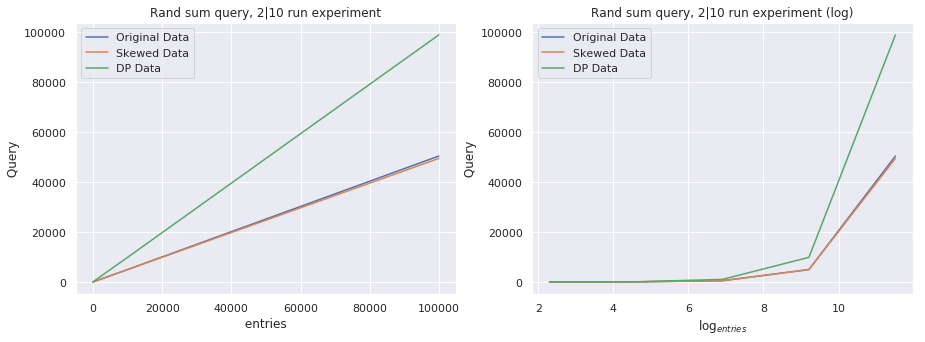

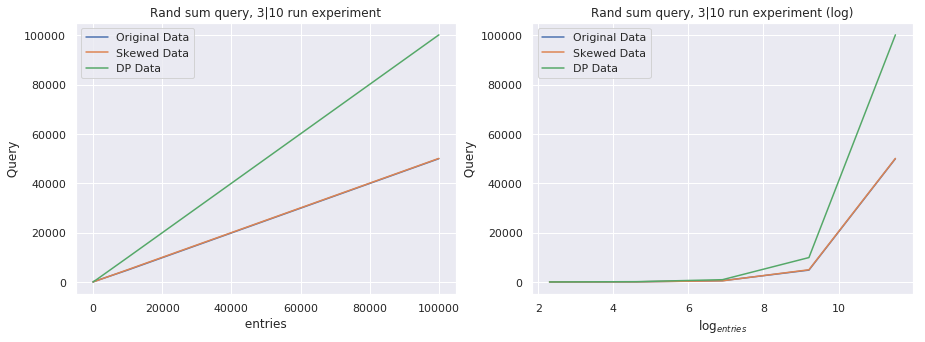

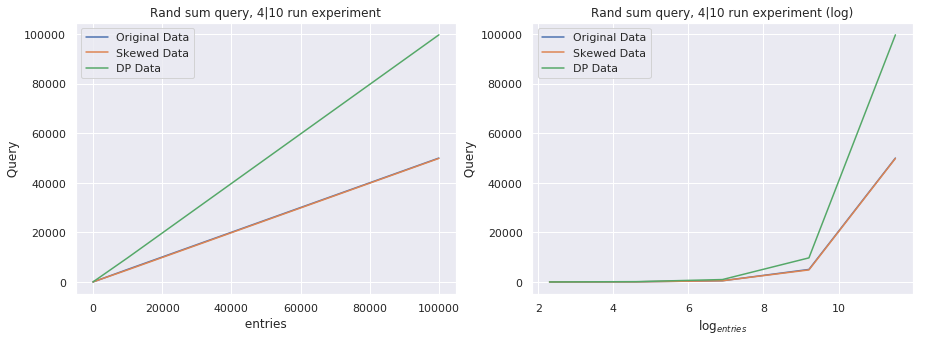

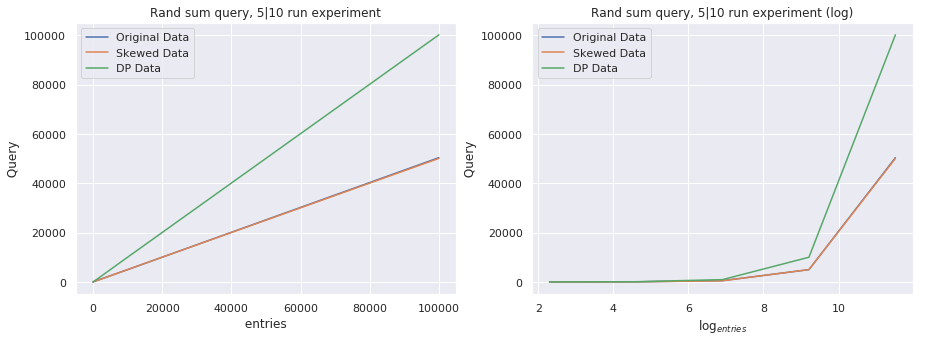

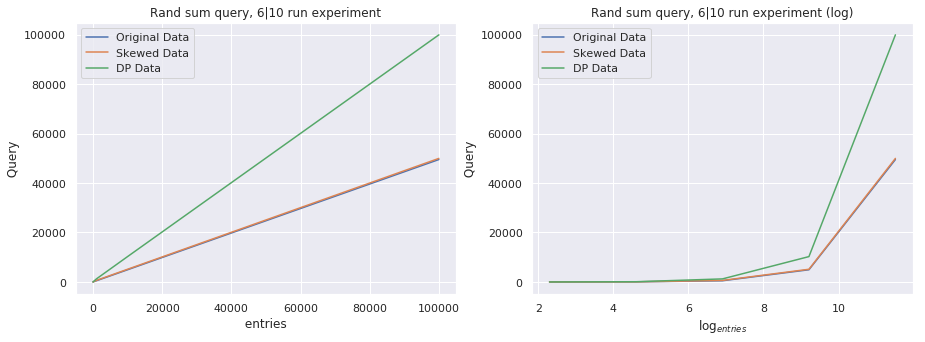

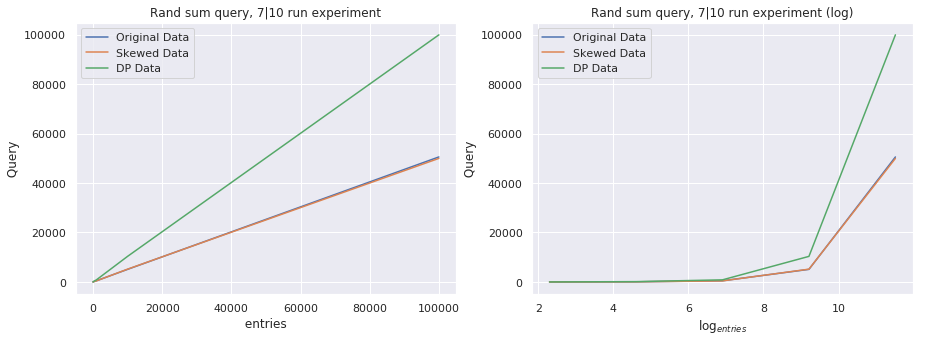

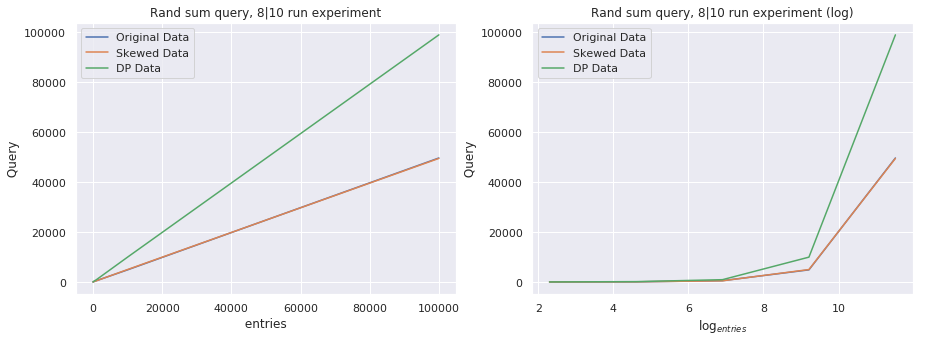

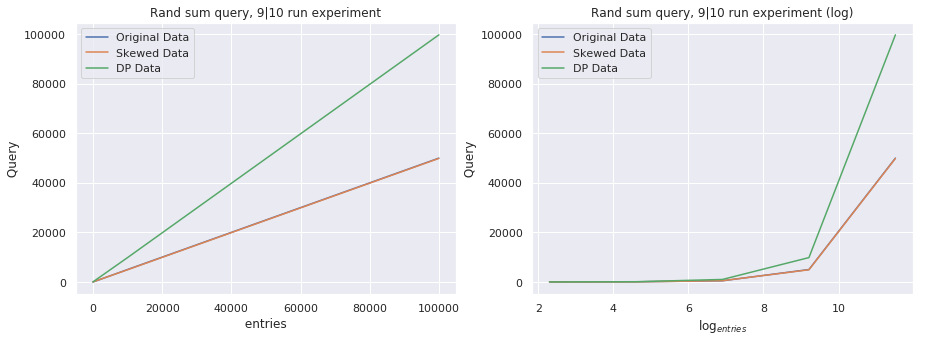

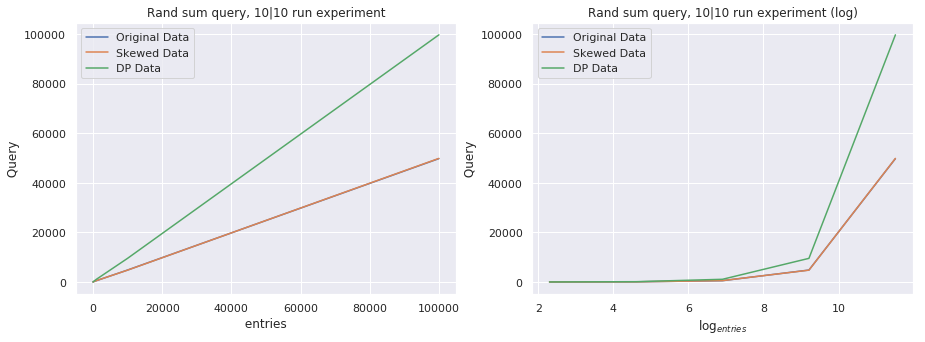

In [15]:
# run the experiment 10 times
for k in range(0, 10):
    run_experiments(rand_sum, entries, name1 = 'Rand sum query, {}|10 run experiment'.format(k + 1), 
                    name2 = 'Rand sum query, {}|10 run experiment (log)'.format(k + 1), file = 'privacy_plot_rand_sum_' + str(k + 1),
                   print_results = False)

---

### Log sum query

Result of the query on data of 10 entries (original|skewed|privacy): 2.5979795455932617 | 2.8257222175598145 | 5.151444435119629
Result of the query on data of 100 entries (original|skewed|privacy): 5.158400535583496 | 5.1971659660339355 | 9.894331932067871
Result of the query on data of 1000 entries (original|skewed|privacy): 7.565062999725342 | 7.526945114135742 | 14.553890228271484
Result of the query on data of 10000 entries (original|skewed|privacy): 9.830730438232422 | 9.824799537658691 | 19.149599075317383
Result of the query on data of 100000 entries (original|skewed|privacy): 12.131878852844238 | 12.134244918823242 | 23.768489837646484


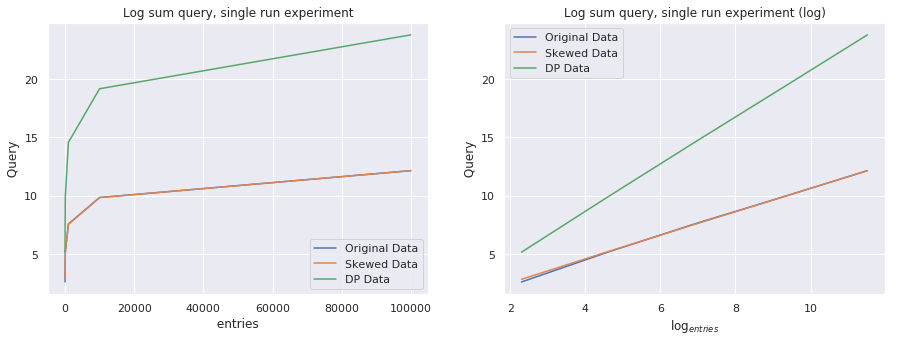

In [16]:
run_experiments(logsum, entries, name1 = 'Log sum query, single run experiment', 
                name2 = 'Log sum query, single run experiment (log)', file = 'privacy_plot_logsum')

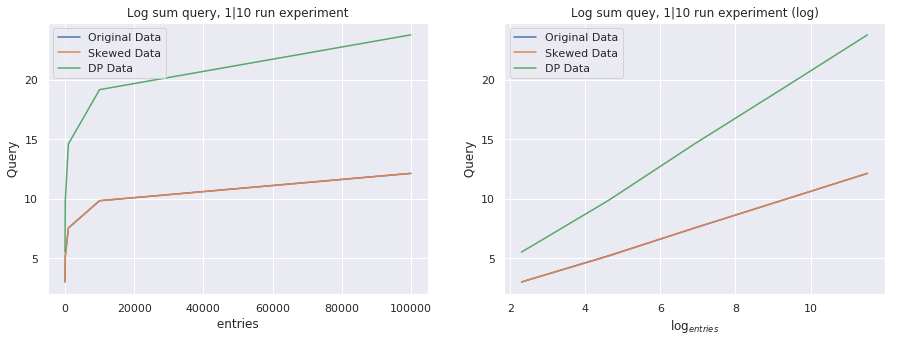

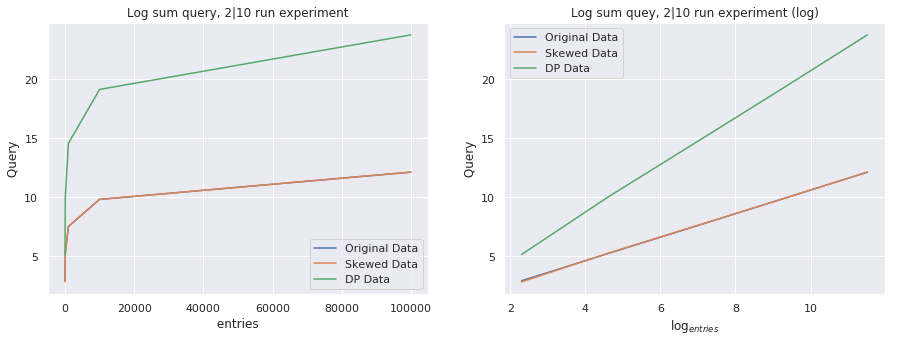

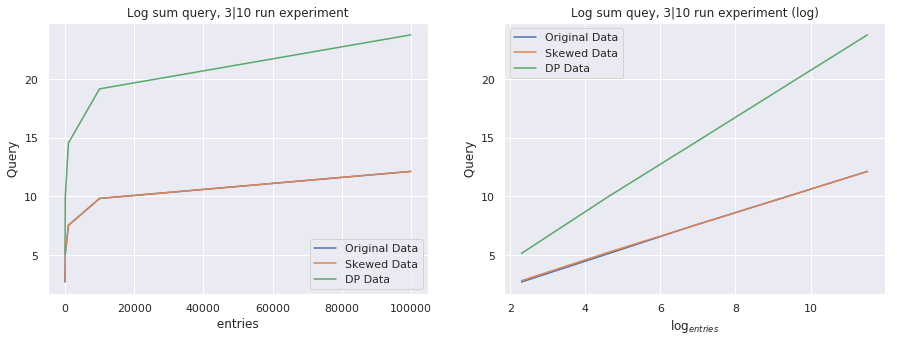

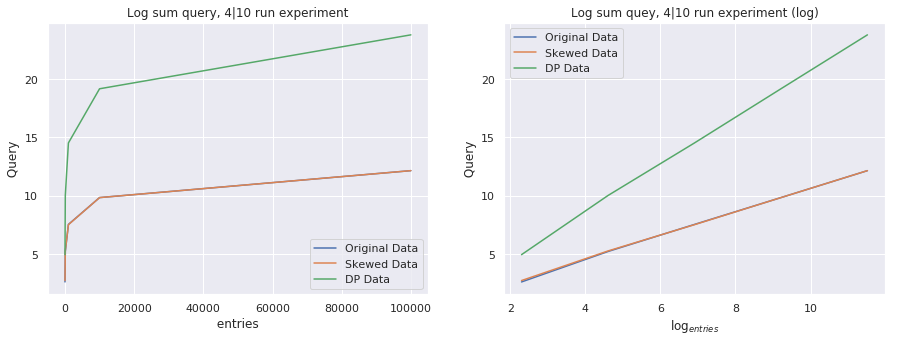

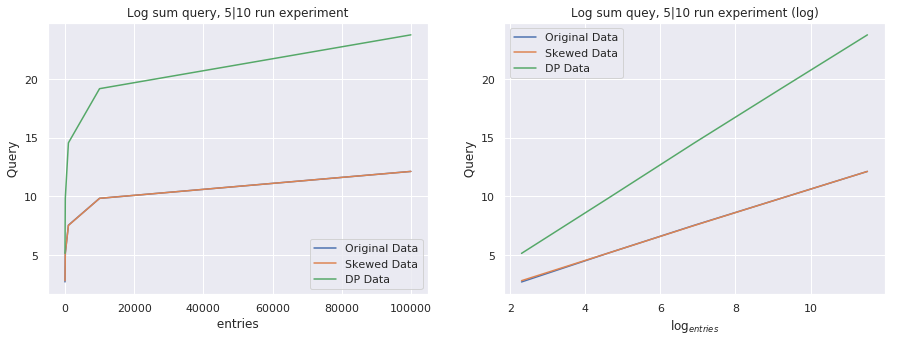

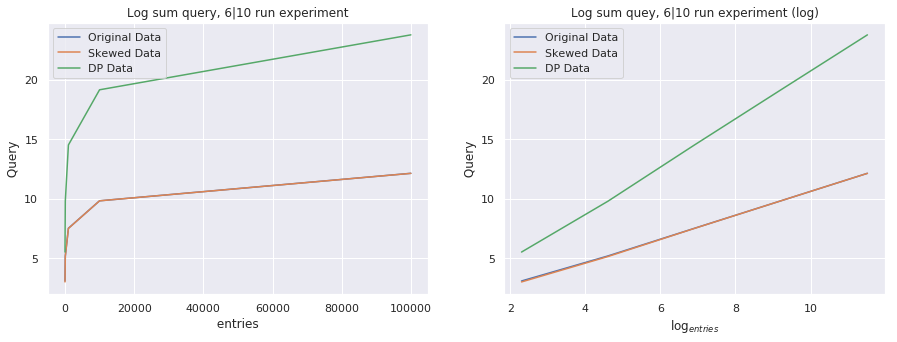

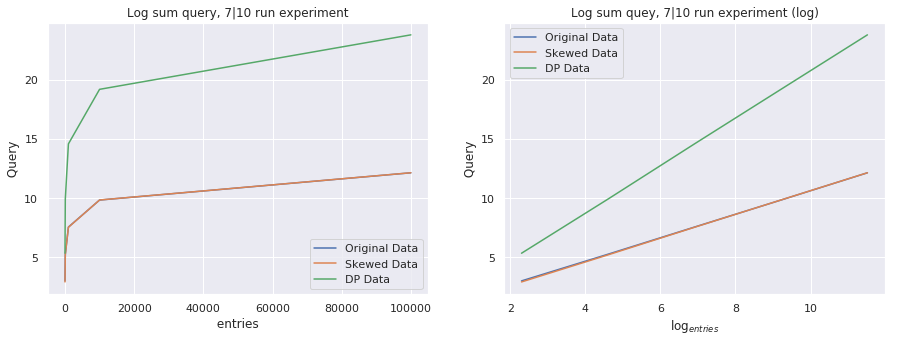

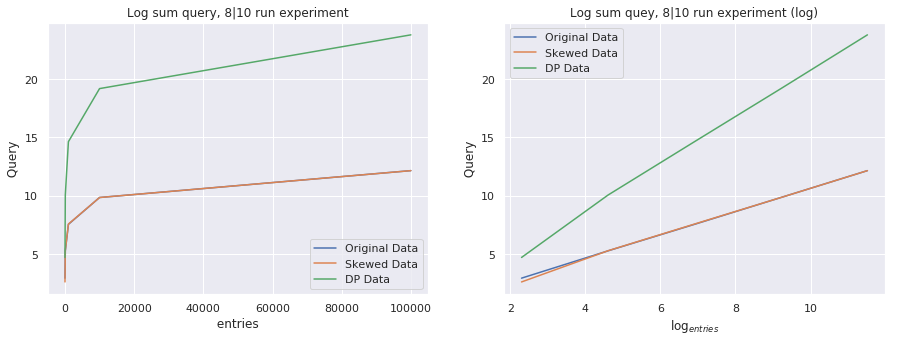

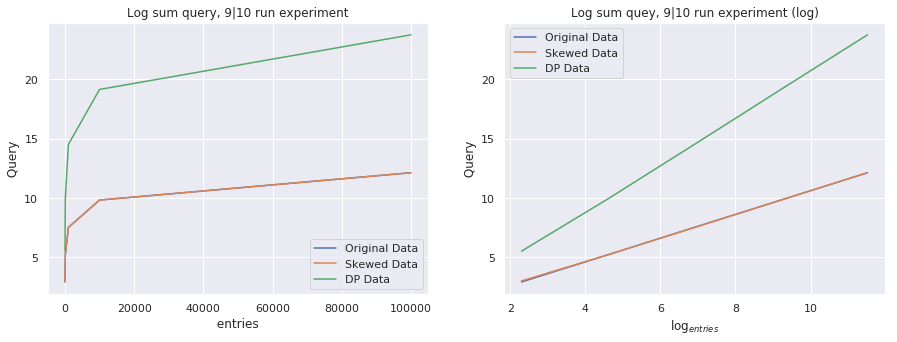

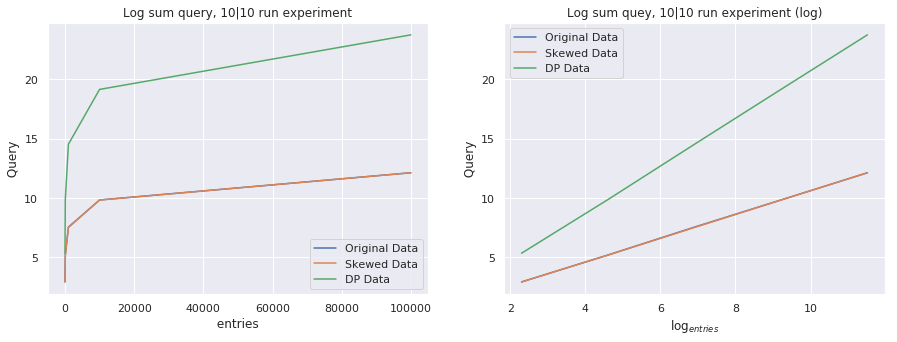

In [17]:
# run the experiment 10 times
for k in range(0, 10):
    run_experiments(logsum, entries, name1 = 'Log sum query, {}|10 run experiment'.format(k + 1), 
                    name2 = 'Log sum quey, {}|10 run experiment (log)'.format(k + 1), file = 'privacy_plot_logsum_' + str(k + 1),
                   print_results = False)

---

### Std query

Result of the query on data of 10 entries (original|skewed|privacy): 0.5163977742195129 | 0.48304590582847595 | 0.4660918116569519
Result of the query on data of 100 entries (original|skewed|privacy): 0.49756985902786255 | 0.5 | 0.5
Result of the query on data of 1000 entries (original|skewed|privacy): 0.4998888671398163 | 0.49952030181884766 | 0.4990406036376953
Result of the query on data of 10000 entries (original|skewed|privacy): 0.5000038146972656 | 0.5 | 0.5
Result of the query on data of 100000 entries (original|skewed|privacy): 0.4999907910823822 | 0.49999764561653137 | 0.49999529123306274


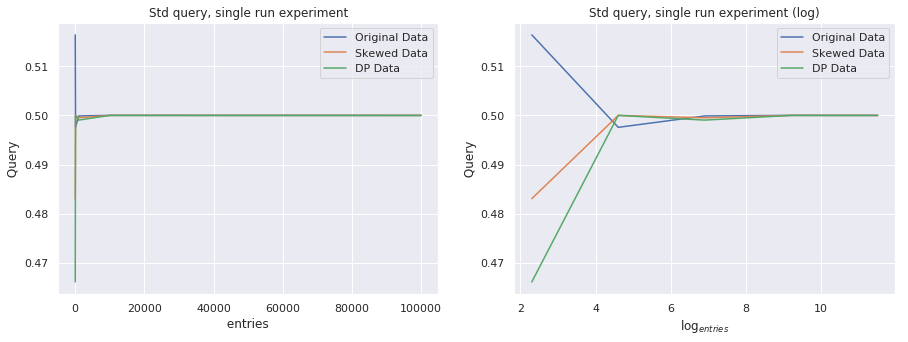

In [18]:
run_experiments(std, entries, name1 = 'Std query, single run experiment', 
                name2 = 'Std query, single run experiment (log)', file = 'privacy_plot_std')

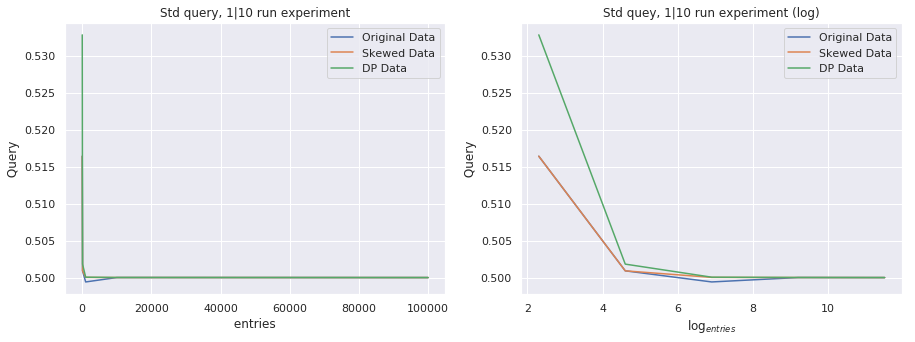

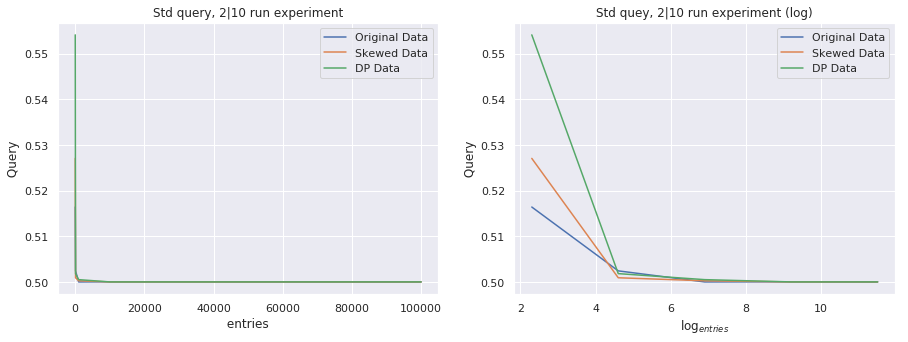

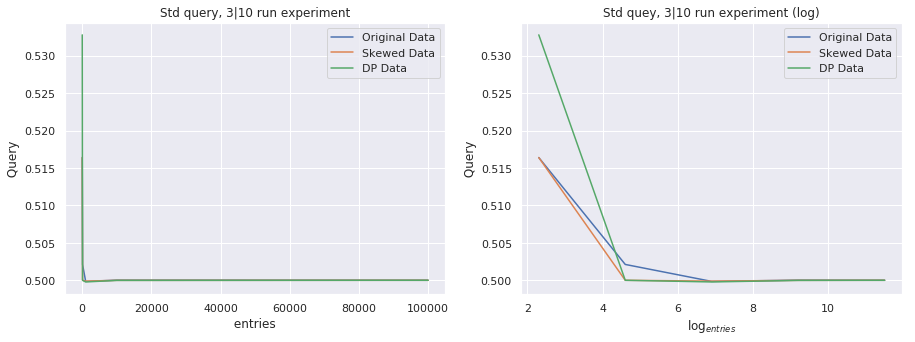

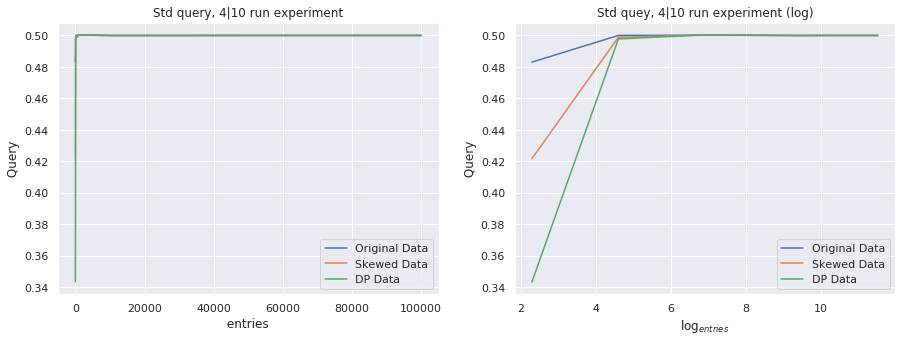

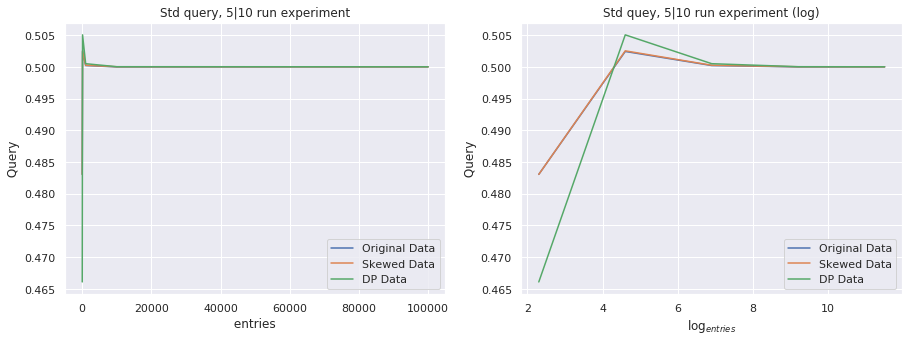

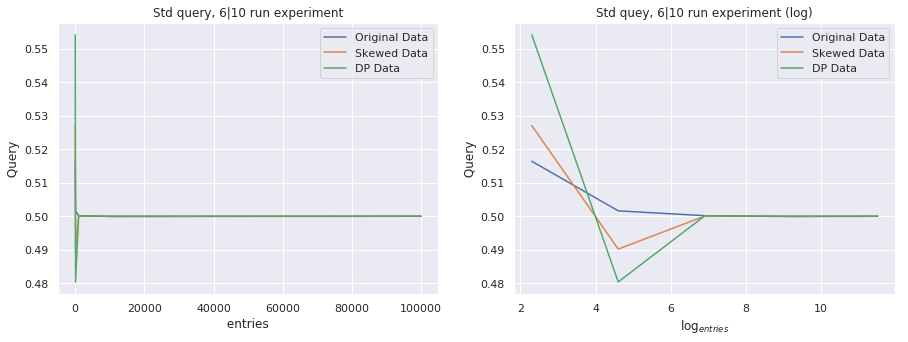

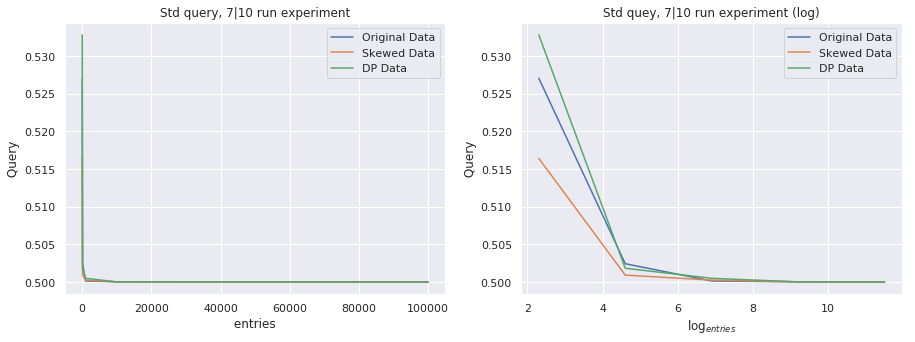

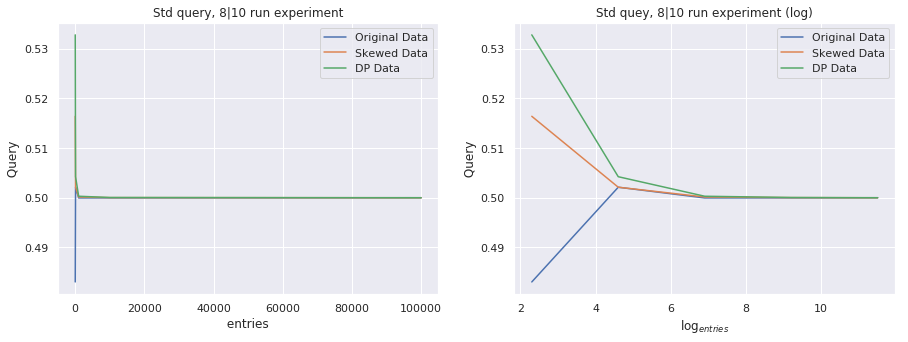

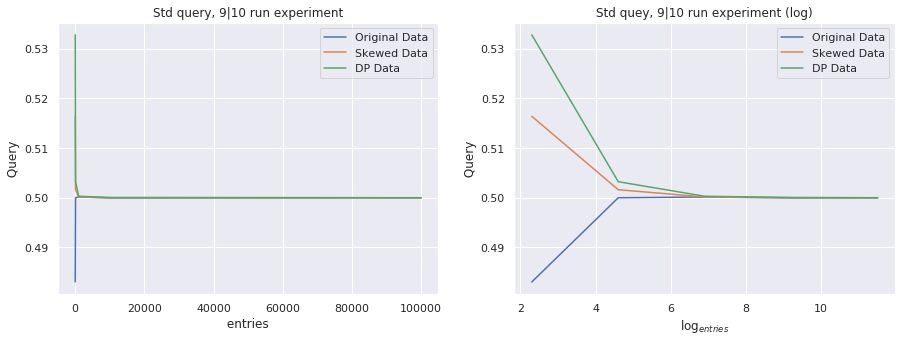

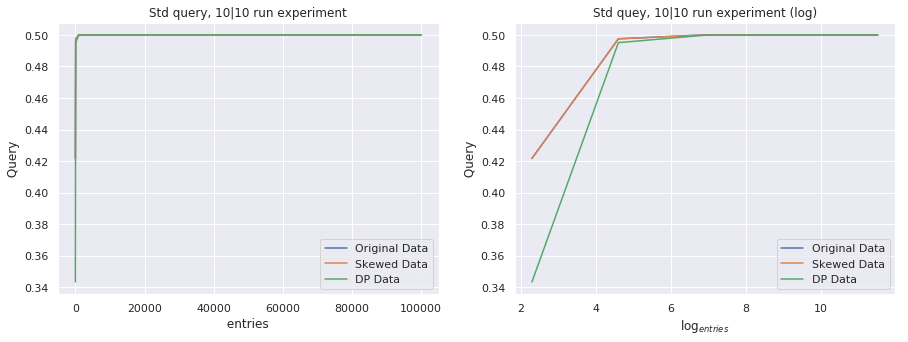

In [19]:
# run the experiment 10 times
for k in range(0, 10):
    run_experiments(std, entries, name1 = 'Std query, {}|10 run experiment'.format(k + 1), 
                    name2 = 'Std quey, {}|10 run experiment (log)'.format(k + 1), file = 'privacy_plot_std_' + str(k + 1),
                   print_results = False)